# Datetime features to capture seasonality

In this notebook we will show...

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_context("talk")

# Data set synopsis

The air passengers dataset is the monthly totals of international airline passengers, from 1949 to 1960, in units of 1000s. 

For instructions on how to download, prepare, and store the dataset, refer to notebook number 5, in the folder "01-Create-Datasets" from this repo.

In [5]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "date_time"],
    parse_dates=["date_time"],
    index_col=["date_time"],
)

We'll use the last 3 years worth of data. If you're computer can handle it, you can try loading and working with the whole dataset.

In [6]:
data = data.loc["2012":]

## Plot the data

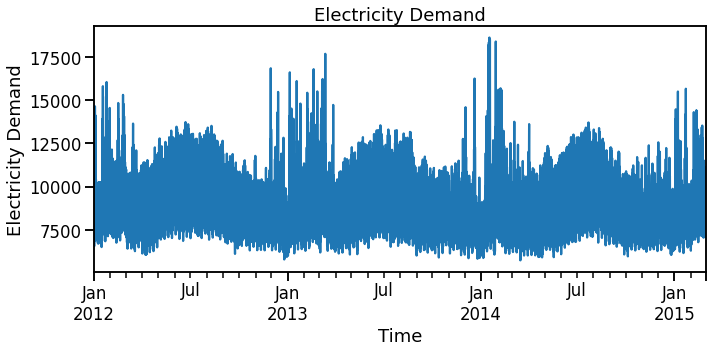

In [8]:
fig, ax = plt.subplots(figsize=[10, 5])
data.plot(y="demand", figsize=[10, 5], legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Electricity Demand")
ax.set_title("Electricity Demand")
plt.tight_layout()

# Creating datetime features with sktime

Datetime features are covered in depth in the `Time Features` section of the course. In that section we show how to create these features in `Pandas` and `Feature-engine`. In this section we show how to create these features using the `DateTimeFeatures` transformer in `sktime`.

In [10]:
from sktime.transformations.series.date import DateTimeFeatures

In [11]:
transformer = DateTimeFeatures(ts_freq="H", # Frequency of the time series
                               feature_scope="comprehensive", # Can be "comprehensive", 
                                                              # "efficient", "minimal".
                                                              # Depending on the time series
                                                              # frequency a sensible set is 
                                                              # automatically chosen.
                               keep_original_columns=True, # Flag if we want to keep columns
                                                           # in dataframe passed to `transform`.
                              )

transformer.fit(data) # This transformer has a fit method which does
                      # not learn any parameters. sktime still  
                      # performs a series of checks when we call `fit` on the time series 
                      # (e.g., is the time series sorted?, are there missing timestamps?).
            
result = transformer.transform(data)
result.head()

/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(
/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(


,demand,year,quarter_of_year,month_of_year,week_of_year,day_of_year,month_of_quarter,week_of_quarter,day_of_quarter,week_of_month,day_of_month,day_of_week,hour_of_day,is_weekend
date_time,,,,,,,,,,,,,,
2012-01-01 00:00:00,7926.529376,2012,1,1,52,1,1,1,1,1,1,6,0,1
2012-01-01 01:00:00,7901.826990,2012,1,1,52,1,1,1,1,1,1,6,1,1
2012-01-01 02:00:00,7255.721350,2012,1,1,52,1,1,1,1,1,1,6,2,1
2012-01-01 03:00:00,6792.503352,2012,1,1,52,1,1,1,1,1,1,6,3,1
2012-01-01 04:00:00,6635.984460,2012,1,1,52,1,1,1,1,1,1,6,4,1


We can also manually select the date time features we want to create using the `manual_selection` argument. 

The valid set of values for `manual_selection` for the most recent version of sktime during the creation of this notebook (i.e., version 0.15.1) is:
- year 
- quarter_of_year 
- month_of_year 
- week_of_year 
- day_of_year 
- month_of_quarter 
- week_of_quarter 
- day_of_quarter 
- week_of_month 
- day_of_month 
- day_of_week 
- hour_of_day 
- minute_of_hour 
- second_of_minute 
- millisecond_of_second 
- is_weekend

In [20]:
# Specify which datetime features to create
datetime_features = [
                       "year",
                       "week_of_year",
                       "month_of_year",
                       "day_of_year",
                       "hour_of_day",
                       "is_weekend",
                    ]

# Create the DateTimeFeatures transformer
transformer = DateTimeFeatures(ts_freq="H", # Frequency of the time series
                               manual_selection=datetime_features, # Select which features to
                                                                   # create
                               keep_original_columns=False, # Flag if we want to keep columns
                                                            # in dataframe passed to `transform`.
                              )

# Fit and transform to create our features
result = transformer.fit_transform(data)
result.head()

/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(
/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(
/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:210: UserWarning: Level of selected dummy variable  lower level than base ts_frequency.
  warnings.warn(


,year,month_of_year,week_of_year,day_of_year,hour_of_day,is_weekend
date_time,,,,,,
2012-01-01 00:00:00,2012,1,52,1,0,1
2012-01-01 01:00:00,2012,1,52,1,1,1
2012-01-01 02:00:00,2012,1,52,1,2,1
2012-01-01 03:00:00,2012,1,52,1,3,1
2012-01-01 04:00:00,2012,1,52,1,4,1


# Let's build some forecasts!

Let's build a recursive forecast and see how our datetime features can capture seasonality.

In [21]:
# Date time features to capture seasonality
from sktime.transformations.series.date import DateTimeFeatures
# Lag and window features
from sktime.transformations.series.summarize import WindowSummarizer
# Time features for trend 
from sktime.transformations.series.time_since import TimeSince
from sklearn.preprocessing import PolynomialFeatures
# Rescaling transformer for linear models with regularisation
from sklearn.preprocessing import MinMaxScaler
# Pipelines to create feature engineering pipeline
from sklearn.pipeline import make_pipeline, make_union
# Used to reset sklearn estimators
from sklearn.base import clone

# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
set_config(transform_output="pandas")  # Upgrade to scikit-learn 0.12
                                       # for this feature

In [22]:
# The data is monthly, let's work with pandas Period.
df = data.copy()
df.head()

,demand
date_time,
2012-01-01 00:00:00,7926.529376
2012-01-01 01:00:00,7901.826990
2012-01-01 02:00:00,7255.721350
2012-01-01 03:00:00,6792.503352
2012-01-01 04:00:00,6635.984460


Specify target name.

In [23]:
target=["demand"] # Note: it's in a list.
                  # This ensures we'll get
                  # a dataframe when using df.loc[:, target]
                  # rather than a pandas Series. 
                  # This can also be useful if we have
                  # multiple targets.

Prepare our transformers.

In [32]:
# Polynomial time features for trend
time_feats = make_pipeline(
                           TimeSince(), 
                           PolynomialFeatures(degree=1, include_bias=False)
                          )

# Datetime features
# Specify which datetime features to create
datetime_features = [
                       "year",
                       "week_of_year",
                       "month_of_year",
                       "day_of_year",
                       "hour_of_day",
                       "is_weekend",
                    ]

# Create the DateTimeFeatures transformer
datetime_feats = DateTimeFeatures(ts_freq="H",
                               manual_selection=datetime_features, 
                               keep_original_columns=False, 
                              )



# Features computed from the target.
# Compute lag and window features.
lag_window_feats = WindowSummarizer(
    lag_feature={
        "lag": np.arange(1, 25),  # Lag features.
        "mean": [[1, 24]],  # [[lag, window size]]
    },
    target_cols=target,
    truncate="bfill",  # Backfill missing values from lagging and windowing.
)

/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(


Create a pipeline to create all our features.

In [33]:
pipeline = make_union(
    datetime_feats,
    time_feats, 
    lag_window_feats,
)

# Apply min-max scaling to all the features
pipeline = make_pipeline(pipeline, MinMaxScaler())

In [34]:
pipeline

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('datetimefeatures',
                                                 DateTimeFeatures(keep_original_columns=False,
                                                                  manual_selection=['year',
                                                                                    'week_of_year',
                                                                                    'month_of_year',
                                                                                    'day_of_year',
                                                                                    'hour_of_day',
                                                                                    'is_weekend'],
                                                                  ts_freq='H')),
                                                ('pipeline',
                                                 Pipeline(steps=[('timesince',
                                                                  TimeSince()),
                                                                 ('polynomialfeatures',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False))])),
                                                ('windowsummarizer',
                                                 WindowSummarizer(lag_feature={'lag': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                                                               'mean': [[1,
                                                                                         24]]},
                                                                  target_cols=['demand'],
                                                                  truncate='bfill'))])),
                ('minmaxscaler', MinMaxScaler())])

Let's check how our feature engineering pipeline behaves.

In [36]:
pipeline.fit_transform(df.head())

/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(
/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:210: UserWarning: Level of selected dummy variable  lower level than base ts_frequency.
  warnings.warn(
/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,year,month_of_year,week_of_year,day_of_year,hour_of_day,is_weekend,time_since_2012-01-01 00:00:00,demand_lag_1,demand_lag_15,demand_lag_14,...,demand_lag_2,demand_lag_23,demand_lag_3,demand_lag_22,demand_lag_4,demand_lag_6,demand_lag_21,demand_lag_5,demand_lag_16,demand_mean_1_24
date_time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.000000,NaN,NaN,...,1.000000,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,0.0,0.0,0.0,0.0,0.25,0.0,0.25,1.000000,NaN,NaN,...,1.000000,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2012-01-01 02:00:00,0.0,0.0,0.0,0.0,0.50,0.0,0.50,0.978217,NaN,NaN,...,1.000000,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2012-01-01 03:00:00,0.0,0.0,0.0,0.0,0.75,0.0,0.75,0.408472,NaN,NaN,...,0.963175,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2012-01-01 04:00:00,0.0,0.0,0.0,0.0,1.00,0.0,1.00,0.000000,NaN,NaN,...,0.000000,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Let's reset our feature engineering pipeline.

In [40]:
# We can use `clone` to return an unfitted version
# of the pipeline.
pipeline = clone(pipeline)

/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(


Let's build a recursive forecast.

We'll start with configuring the model, the forecast start time, the number of steps to forecast, and the forecasting horizon, and the model.

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

In [43]:
# --- CONFIG --- #
# Define time of first forecast, this determines our train / test split.                                              
forecast_start_time = df.index.max() - pd.DateOffset(weeks=2) # Start two weeks from the end.

# Define number of steps to forecast.
num_of_forecast_steps = 24*7

# Define the model.
model = LGBMRegressor(
                      boosting = "gbdt",
                      linear_tree=True, 
                      linear_lambda=0.1,
                      learning_rate=0.1,
                      n_estimators=100,
                     )

# Create a list of periods that we'll forecast over.
forecast_horizon = pd.date_range(forecast_start_time, 
                                   periods=num_of_forecast_steps,
                                   freq="H")

# How much data in the past is needed to create our features
look_back_window_size = pd.DateOffset(weeks=1) # We need the latest 24*7 time periods
                                             # in our predict dataframe to build our 
                                             # window features.

Let's create our training dataframe.

In [44]:
# --- CREATE TRAINING & TESTING DATAFRAME  --- #
# Ensure we only have training data up to the start
# of the forecast.
df_train = df.loc[df.index < forecast_start_time].copy()
df_test = df.loc[df.index >= forecast_start_time].copy()

Let's prepare the dataframe that we will pass to `model.predict()`. This will contain some portion of time series during the training period so we can create any features that require historic data.

In [45]:
# --- CREATE DYNAMIC PREDICTION DATAFRAME  --- #
# We will recursively append our forecasts to this 
# dataframe and re-compute our lag and window features from the
# target in this dataframe. It contains data in both the training period 
# and forecast period which is needed for some transformers (e.g., lags and windows).
look_back_start_time = forecast_start_time - look_back_window_size

# Create `df_predict` which has data going as far back
# as needed to create features which need past values.
df_predict = df_train.loc[look_back_start_time:].copy()

# Extend index into forecast horizon
df_predict = pd.concat([
                  df_predict,
                  pd.DataFrame(index=forecast_horizon)
                 ])

Let's compute our `X_train` and `y_train` and fit our model!

In [47]:
# --- FEATURE ENGINEERING--- #
# Create X_train and y_train
y_train = df_train[target]
X_train = pipeline.fit_transform(df_train)

# --- MODEL TRAINING---#
# Train one-step ahead forecast model
model.fit(X_train, y_train)

/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:151: FutureWarning: Currently the default value of `keep_original_columns
 is `True`. In future releases this will be changed 
 to `False`. To keep the current behaviour explicitly 
 set `keep_original_columns=True`.
  warnings.warn(
/Users/kishan_manani/.pyenv/versions/3.8.7/envs/udemy-ts/lib/python3.8/site-packages/sktime/transformations/series/date.py:210: UserWarning: Level of selected dummy variable  lower level than base ts_frequency.
  warnings.warn(


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


[LightGBM] [Fatal] Do not support special JSON characters in feature name.


LightGBMError: Do not support special JSON characters in feature name.

Let's recursively create `X_test` and make our predictions and append them to the `df_predict` dataframe.

In [231]:
# --- RECURSIVE FORECASTING LOOP --- #
for forecast_time in forecast_horizon:    
    # Compute features during the forecast horizon
    X_test = feat_eng_trafo.transform(df_predict)
    X_test = X_test.loc[[forecast_time]] 

    # Predict one step ahead. 
    y_pred = model.predict(X_test)
    
    # Append forecast to the target variable columnn in our
    # dynamic forecast dataframe `df_forecast`. This `df_forecast`
    # is ready for the next iteration where we will re-compute
    # features derived from the target such as lags and windows.
    df_predict.loc[[forecast_time], target] = y_pred

Let's retrieve our forecast and actuals during the forest horizon.

In [232]:
# --- GET FORECAST AND TEST VALUES --- #    
y_forecast = df_predict.loc[forecast_horizon, target]
y_test = df_test.loc[forecast_start_time:, target]

Let's create predictions on the training set using our one step ahead forecast model. This is useful to plot when debugging models.

In [233]:
# --- CREATE IN-SAMPLE PREDICTIONS--- #
y_forecast_train = model.predict(X_train)
y_forecast_train = pd.DataFrame(y_forecast_train, index=X_train.index, columns=target)

Let's plot the forecast!

Text(0.5, 1.0, 'Forecast with HistGradientBoostingRegressor(learning_rate=0.05)')

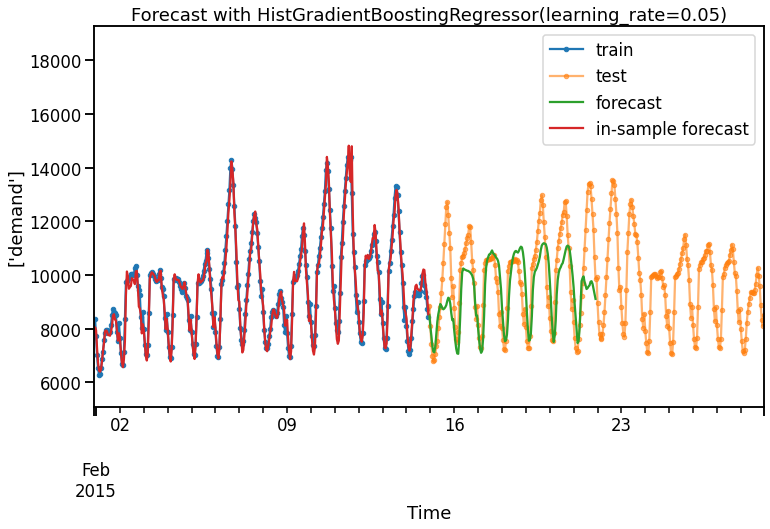

In [234]:
# --- PLOTTING --- #
# Plot the forecast.
fig, ax = plt.subplots(figsize=[12, 7])

# Plot training set.
y_train.plot(ax=ax, marker='.')
# Plot actuals in forecasting horizon.
y_test.plot(ax=ax, marker='.', alpha=0.6)
# Plot forecast.
y_forecast.plot(ax=ax)
# Plot 1 step forecasts in training data.
y_forecast_train.plot(ax=ax)

ax.legend(["train", "test", "forecast", "in-sample forecast"])
ax.set_xlim(xmin=y_train.index.max()-24*7*2)
ax.set_xlabel("Time")
ax.set_ylabel(f"{target}")
ax.set_title(f"Forecast with {model}")

Let's compute the RMSE of this forecast.

In [235]:
# Compute error metrics.
from sklearn.metrics import mean_squared_error

mean_squared_error(y_forecast, y_test.loc[y_forecast.index], squared=False)

1361.7472858965227

We can see how seasonal lags are an easy way to capture seasonality.

Feel free to change the dates, try different models, and different features!